In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMites/Loan-Approval-Prediction.csv')

In [85]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* Unique features like LOAN_ID not considered in ML

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [87]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
data.shape

(614, 13)

In [89]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

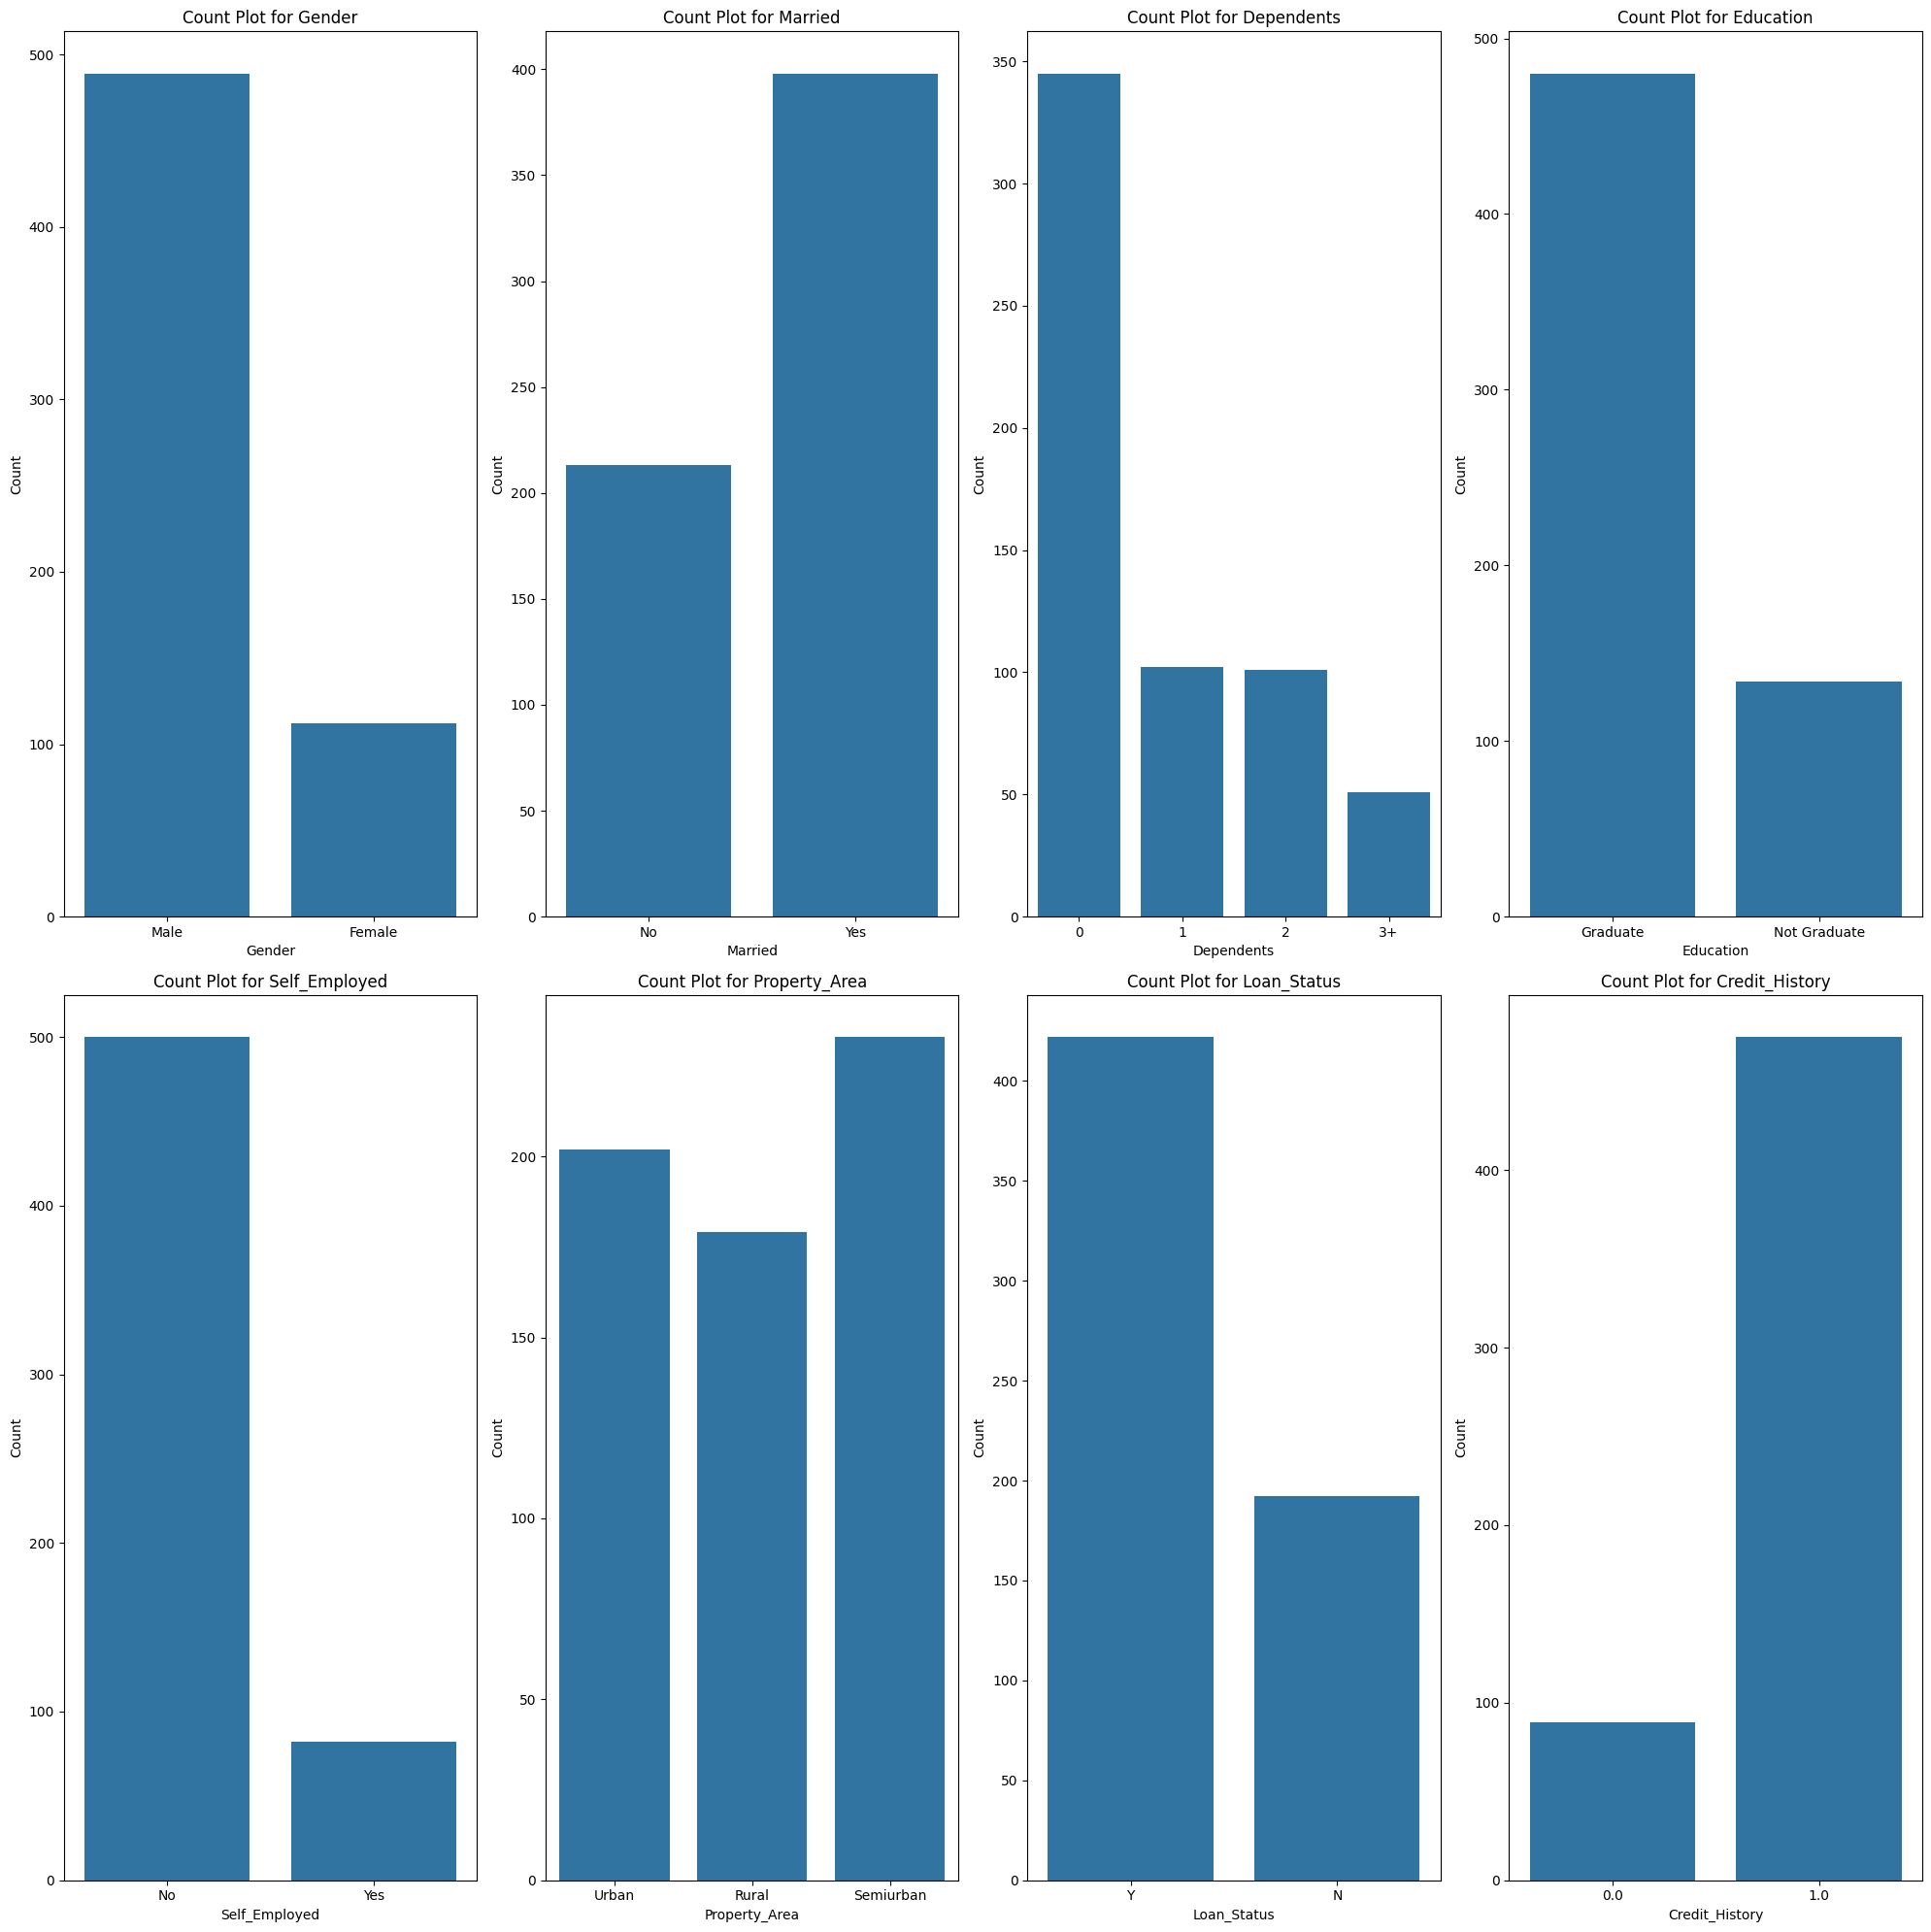

In [92]:

columns_to_plot = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status','Credit_History']


fig, axes = plt.subplots(2, 4, figsize=(20, 20))

# Flatten the axes if needed
axes = axes.flatten()

# Iterate over columns and create count plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# # If there are any leftover plots, remove them
# for j in range(num_cols, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


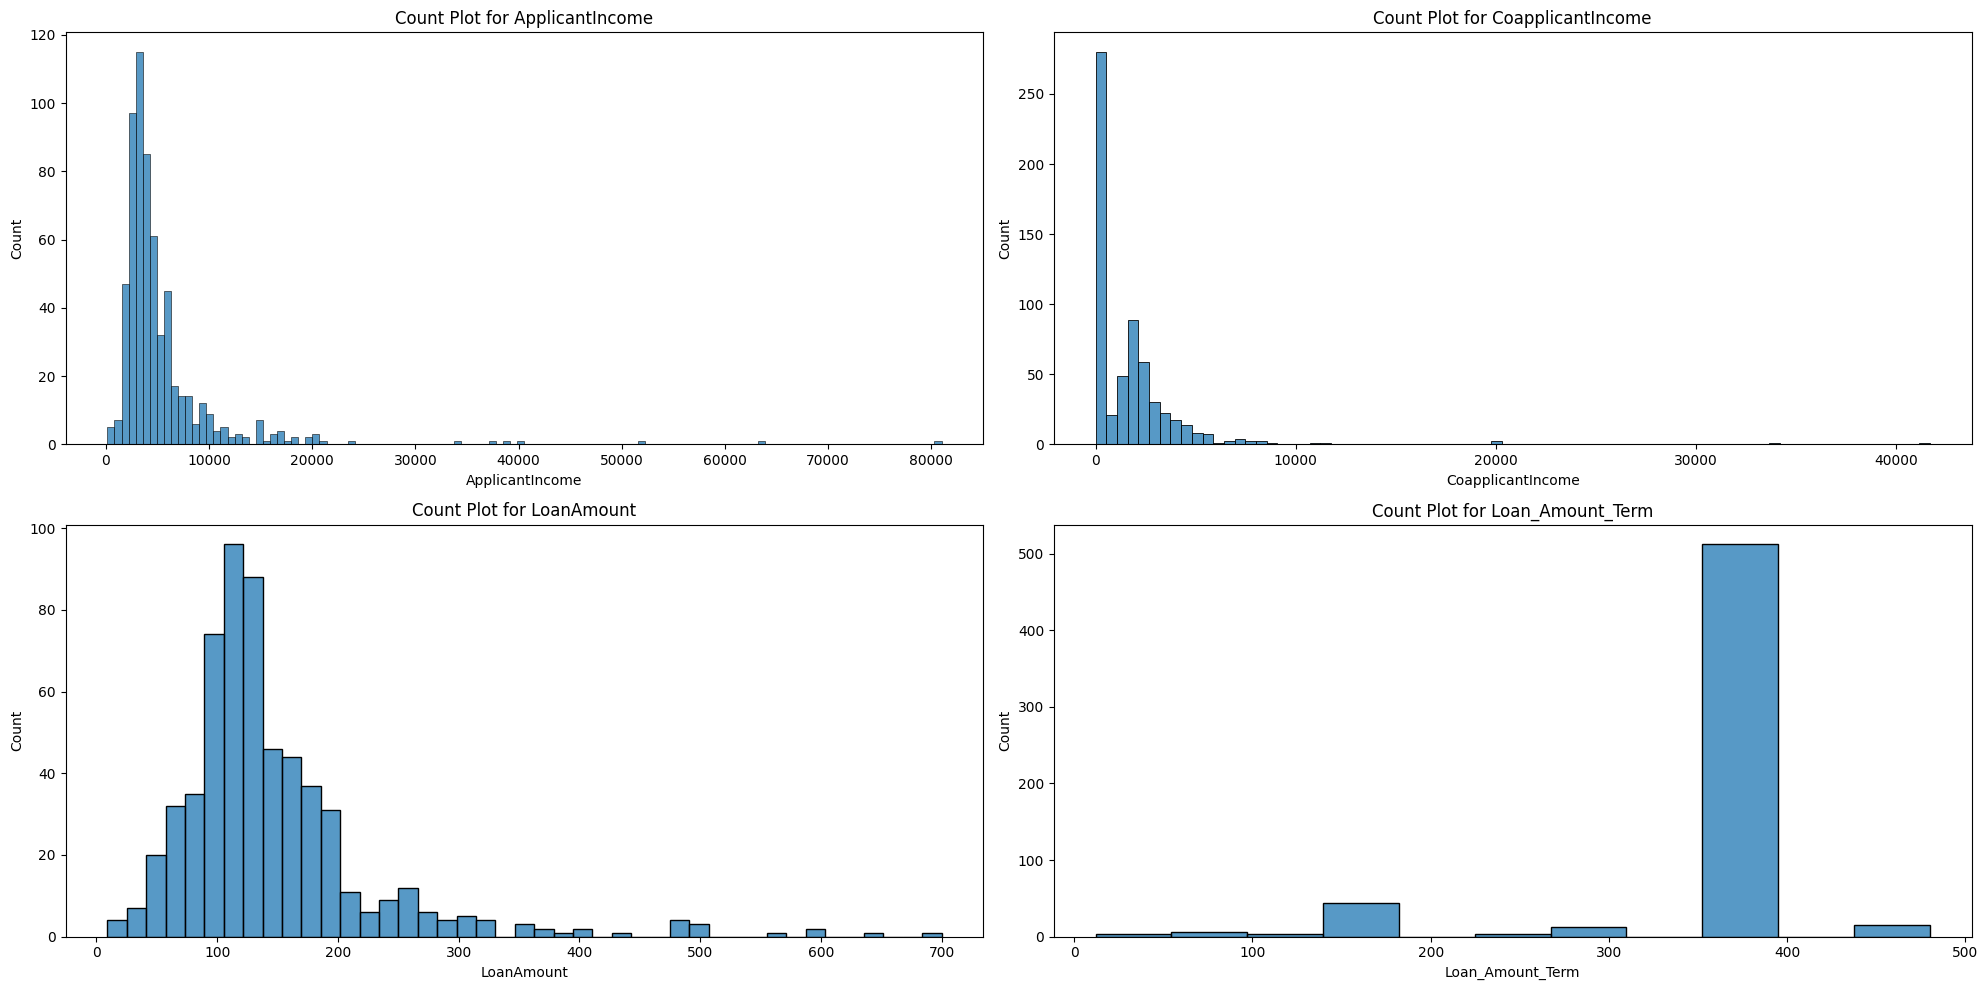

In [93]:

columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']


fig, axes = plt.subplots(2, 2,figsize=(20,10))

# Flatten the axes if needed
axes = axes.flatten()

# Iterate over columns and create count plots
for i, col in enumerate(columns_to_plot):
    sns.histplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# # If there are any leftover plots, remove them
# for j in range(num_cols, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [94]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [95]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [96]:
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [107]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [106]:
data.loc[data['Married'].isna() == True,'Married'] = 'Yes'

In [98]:
data.loc[data['LoanAmount'].isna() == True,'LoanAmount'] = np.median(data['LoanAmount'].dropna(),axis=0)

In [99]:
data.loc[data['Credit_History'].isna() == True,'Credit_History'] = 1

In [100]:
data.loc[data['Loan_Amount_Term'].isna() == True,'Loan_Amount_Term'] = np.median(data['Loan_Amount_Term'].dropna(),axis=0)

In [101]:
data.loc[data['Self_Employed'].isna() == True,'Self_Employed'] = 'No'

In [102]:
data.loc[data['Dependents'].isna() == True,'Dependents'] = '0'

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [109]:
from sklearn.preprocessing import LabelEncoder
LC = LabelEncoder()

data['Married'] = LC.fit_transform(data['Married'])
data['Education'] = LC.fit_transform(data['Education'])
data['Dependents'] = LC.fit_transform(data['Dependents'])
data['Self_Employed'] = LC.fit_transform(data['Self_Employed'])
data['Property_Area'] = LC.fit_transform(data['Property_Area'])
data['Loan_Status'] = LC.fit_transform(data['Loan_Status'])
data['Loan_Amount_Term'] = LC.fit_transform(data['Loan_Amount_Term'])

In [110]:
data['Gender'] = pd.get_dummies(data['Gender'],drop_first=True)

In [111]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,1.0,2,1


In [112]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']] = scale.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [113]:
data = data.drop('Loan_ID', axis = 1)

In [115]:
corr_data = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

<Axes: >

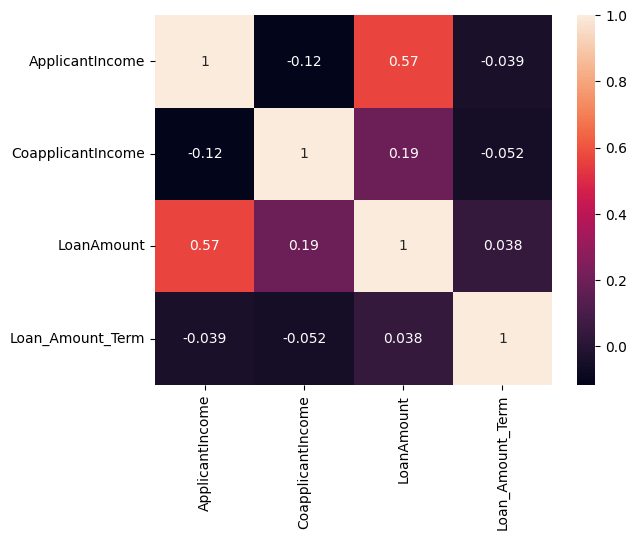

In [116]:
sns.heatmap(corr_data.corr(),annot=True)

In [117]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.064978,0.038910,0.197905,0.851972,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.075560,0.070229,0.121718,0.123247,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033735,0.000000,0.132055,0.888889,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045300,0.028524,0.172214,0.888889,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.069821,0.055134,0.225398,0.888889,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [118]:
data.duplicated().sum()

0

In [119]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.070489,0.000000,0.172214,0.888889,1.0,2,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.888889,1.0,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.888889,1.0,2,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.888889,1.0,2,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.888889,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.034014,0.000000,0.089725,0.888889,1.0,0,1
610,1,1,3,0,0,0.048930,0.000000,0.044863,0.555556,1.0,0,1
611,1,1,1,0,0,0.097984,0.005760,0.353111,0.888889,1.0,2,1
612,1,1,2,0,0,0.091936,0.000000,0.257598,0.888889,1.0,2,1


In [120]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [121]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Imbalance Handling

In [123]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [124]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [125]:
from collections import Counter
print('Actual Classes', Counter(y_train))
print('Smote Classes', Counter(y_smote))

Actual Classes Counter({1: 338, 0: 153})
Smote Classes Counter({0: 338, 1: 338})


In [126]:
from sklearn.svm import SVC

svclassifier = SVC()
svclassifier.fit(X_smote, y_smote)

SVC()

In [127]:
y_preds = svclassifier.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_preds)

0.7560975609756098

In [129]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        39
           1       0.77      0.92      0.84        84

    accuracy                           0.76       123
   macro avg       0.73      0.66      0.68       123
weighted avg       0.75      0.76      0.74       123



In [130]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(score)
print('Cross Val Score : ', score.mean())
print('Std : ', score.std())

#std of < 0.05 is good.

[0.87066246 0.86875    0.89032258]
Cross Val Score :  0.8765783470709948
Std :  0.009749951923361921


In [141]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

def svc_randomized_search(X_train, y_train, X_test, y_test, n_iter=100, cv=5, random_state=1):
    # Define the parameter grid
    param_distributions = {'C': [0.1,1,10,100,1000],
                           'gamma': [1,0.1,0.01,0.001,0.0001]}

    # Create the SVC classifier
    svc = SVC()

    # Perform Randomized Search CV
    randomized_search = RandomizedSearchCV(estimator=svc,
                                           param_distributions=param_distributions,
                                           n_iter=n_iter,
                                           cv=cv,
                                           random_state=random_state,
                                           n_jobs=-1,
                                           verbose=True)
    # Fit the model
    randomized_search.fit(X_train, y_train)

    # Get the best parameters, best estimator, and best scores
    best_params = randomized_search.best_params_
    best_estimator = randomized_search.best_estimator_

    # Predictions on test set
    y_pred = best_estimator.predict(X_test)

    # Calculate accuracy on test set
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print everything
    print("Best parameters:", best_params)
    print("Best estimator:", best_estimator)
    print("Accuracy on test set:", accuracy)
    print("Classification report:\n", report)

    # Return everything
    return best_params, best_estimator, accuracy, report

In [142]:
# Assuming you have X_train, y_train, X_test, y_test already defined
best_params, best_estimator, accuracy, report = svc_randomized_search(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'gamma': 0.1, 'C': 1}
Best estimator: SVC(C=1, gamma=0.1)
Accuracy on test set: 0.8048780487804879
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [143]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

def svc_grid_search(X_train, y_train, X_test, y_test, cv=5):
    # Define the parameter grid
    param_dist = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}

    # Create the SVC classifier
    svc = SVC()

    # Perform grid Search CV
    grid_search = GridSearchCV(estimator=svc,
                              param_grid=param_dist,
                              cv=cv,
                              n_jobs=-1,
                              verbose=True)
    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters, best estimator, and best scores
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Predictions on test set
    y_pred = best_estimator.predict(X_test)

    # Calculate accuracy on test set
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print everything
    print("Best parameters:", best_params)
    print("Best estimator:", best_estimator)
    print("Accuracy on test set:", accuracy)
    print("Classification report:\n", report)

    # Return everything
    return best_params, best_estimator, accuracy, report

In [144]:
a,b,c,d = svc_grid_search(X_train, y_train, X_test, y_test, cv=5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'C': 1, 'gamma': 0.1}
Best estimator: SVC(C=1, gamma=0.1)
Accuracy on test set: 0.8048780487804879
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [162]:
score_after = cross_val_score(best_estimator,X,y,cv=5,scoring='f1')


In [163]:
score_after.mean()

0.8766952317357394

In [164]:
score_after.std()

0.0161139202067473